## Load the data

In [113]:
import pandas as pd
import numpy as np

inputs = pd.read_csv(r'/Users/nashitaabd/Documents/SUTD/T6/MachineLearning/HW1/data/3/hw1_ridge_x.dat')
outputs = pd.read_csv(r'/Users/nashitaabd/Documents/SUTD/T6/MachineLearning/HW1/data/3/hw1_ridge_y.dat')


In [114]:
vX = inputs[:10]
tX = inputs[10:]

In [115]:
vY = outputs[:10]
tY = outputs[10:]

In [116]:
vX = vX.as_matrix(columns=vX.columns[0:])
tX = tX.as_matrix(columns=tX.columns[0:])
vY = vY.as_matrix(columns=vY.columns[0:])
tY = tY.as_matrix(columns=tY.columns[0:])

## Ridge Regression

In [117]:
def ridge_regression(tX, tY, l):
    n = tX.shape[0]
    I = np.identity(tX.shape[1])
    
    xtranspose = tX.transpose()
    b = np.matmul(xtranspose,tX)
    
    a = (n*l*I)+(b)
    ainv = np.linalg.inv(a)
    
    c = np.matmul(xtranspose,tY)
    
    w = np.matmul(ainv,c)
    
    return w

###  (a) Write a function ridge regression(tX, tY, l) that takes the training features, training responses and regularizing parameter λ, and outputs the exact solution θ for ridge regres- sion. Report the resulting value of θ for λ = 0.15.

In [118]:
w = ridge_regression(tX, tY, 0.15)
print("theta after ridge regression: ")
print("theta0 = ", w[0])
print("theta1 = ", w[1])
print("theta2 = ", w[2])
print("theta3 = ", w[3])

theta after ridge regression: 
theta0 =  [-0.58700227]
theta1 =  [ 1.1462863]
theta2 =  [ 0.04540121]
theta3 =  [-1.59338005]


### (b) Use the following code to plot graphs of the validation loss and training loss as λ varies on logarithmic scale from λ = 10−5 to λ = 100. Write down the value of λ that minimizes the validation loss.

Lowest Lambda is  -1.8


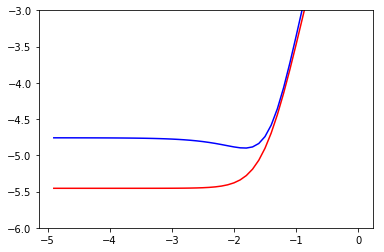

In [119]:
import matplotlib . pyplot as plt

tn = tX.shape[0] 
vn = vX.shape[0]
tloss = []
vloss = []
index = -np.arange(0,5,0.1)
for i in index :
    w = ridge_regression(tX,tY,10**i)
    tloss = tloss+[np.sum((np.dot(tX,w)-tY)**2)/tn/2] 
    vloss = vloss+[np.sum((np.dot(vX,w)-vY)**2)/vn/2]
plt.plot(index,np.log(tloss),'r') 
plt.plot(index,np.log(vloss),'b')
plt.ylim(-6, -3)

print("Lowest Lambda is ", index[vloss.index(min(vloss))])